In [21]:
pip install numpy-stl

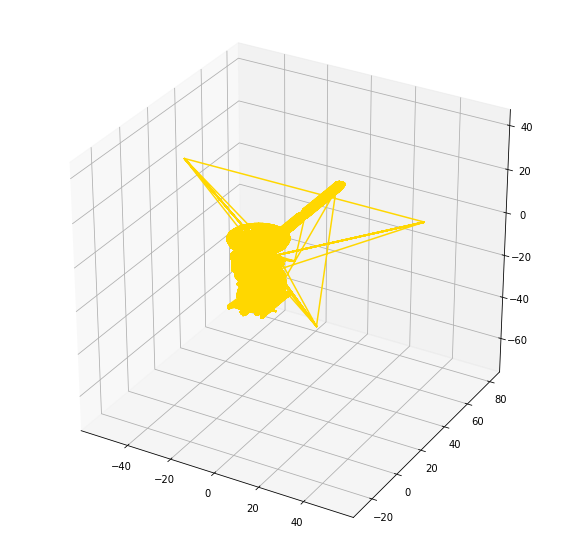

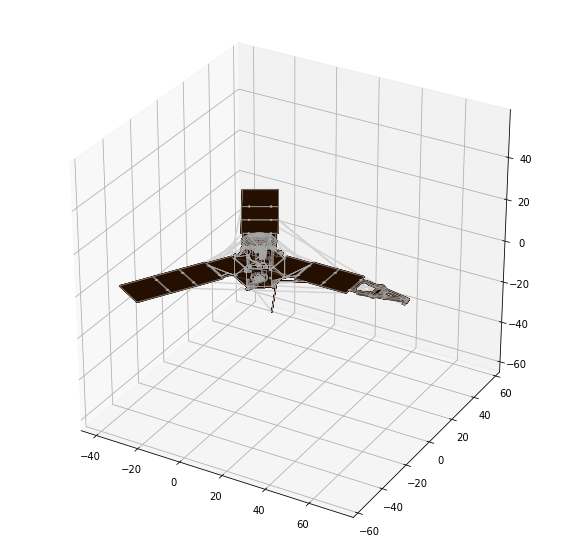

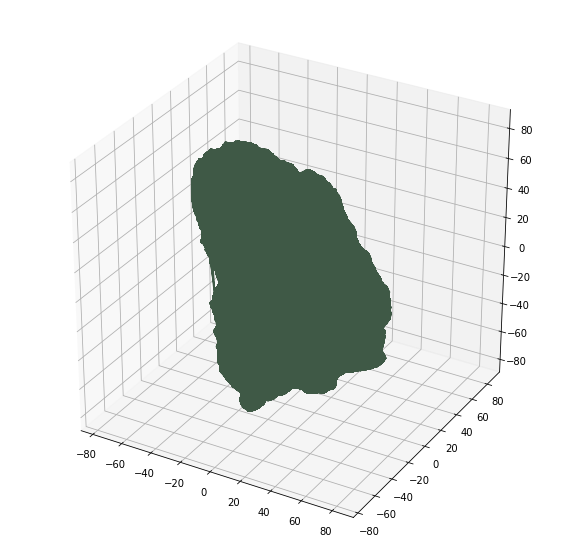

In [38]:
"""

	This code has created by Alvaro Davi using STL models avaliable on:
		https://nasa3d.arc.nasa.gov/models



	Segundo Trabalho: Animacao Tridimensional usando Transformacoes Matriciais

	Alvaro Davi S. Alves - 2020101874

	Expressao Grafica para Engenharia

	Universidade Federal do Espirito Santo

"""



''' import libs '''
import numpy as np # numeric manipulations, constants and functions
 # scientific methods and functions
import matplotlib.pyplot as plt # graphics and math expressions plot
#%matplotlib inline # show plots on jupyter notebook line
from mpl_toolkits.mplot3d import Axes3D, art3d # class and module to 3D projection
from math import sin, cos, tan # trigonometric functions
from stl import mesh # .stl files read


''' load the STL files and add the vectors to the plot '''
cassini_stl = mesh.Mesh.from_file("./models/cassini.stl")
juno_stl = mesh.Mesh.from_file("./models/Juno.stl")
rock_ground_stl = mesh.Mesh.from_file("./models/Block_Island.stl")

'''
figure = plt.figure()
axes = Axes3D(figure)
axes.add_collection3d(art3d.Poly3DCollection(cassini_stl.vectors))
scale = cassini_stl.points.flatten()
axes.auto_scale_xyz(scale, scale, scale)
'''


# -----------------------------------------------------------------------------------------------------------------


''' make axes of 3D plot have equal scale so that spheres appear as spheres, cubes as cubes, etc..  This is one possible solution to Matplotlib's ax.set_aspect('equal') and ax.axis('equal') not working for 3D '''
def set_axes_equal(ax): # 'ax' is a matplotlib axis, e.g., as output from plt.gca()

	x_limits = ax.get_xlim3d()
	y_limits = ax.get_ylim3d()
	z_limits = ax.get_zlim3d()

	x_range = abs(x_limits[1] - x_limits[0])
	x_middle = np.mean(x_limits)
	y_range = abs(y_limits[1] - y_limits[0])
	y_middle = np.mean(y_limits)
	z_range = abs(z_limits[1] - z_limits[0])
	z_middle = np.mean(z_limits)

	plot_radius = 0.5*max([x_range, y_range, z_range]) # the plot bounding box is a sphere in the sense of the infinity norm, hence I call half the max range the plot radius

	ax.set_xlim3d([x_middle - plot_radius, x_middle + plot_radius])
	ax.set_ylim3d([y_middle - plot_radius, y_middle + plot_radius])
	ax.set_zlim3d([z_middle - plot_radius, z_middle + plot_radius])


''' get the Cassini x, y, z coordinates contained in the mesh structure - readed from STL - that are the vertices of the triangular faces of the object '''
cassini_x = cassini_stl.x.flatten()
cassini_y = cassini_stl.y.flatten()
cassini_z = cassini_stl.z.flatten()
''' get the Juno x, y, z coordinates '''
juno_x = juno_stl.x.flatten()
juno_y = juno_stl.y.flatten()
juno_z = juno_stl.z.flatten()
''' get the Block Island x, y, z coordinates '''
rock_x = rock_ground_stl.x.flatten()
rock_y = rock_ground_stl.y.flatten()
rock_z = rock_ground_stl.z.flatten()

''' get the vectors that define the triangular faces that form the 3D object '''
cassini_vectors = cassini_stl.vectors
juno_vectors = juno_stl.vectors
rock_vectors = rock_ground_stl.vectors

''' create the 3D objects from the x,y,z coordinates and add the additional array of ones to represent the object using homogeneous coordinates '''
cassini = np.array([cassini_x.T,cassini_y.T,cassini_z.T,np.ones(cassini_x.size)])
juno = np.array([juno_x.T,juno_y.T,juno_z.T,np.ones(juno_x.size)])
rock = np.array([rock_x.T,rock_y.T,rock_z.T,np.ones(rock_x.size)]) # transposed to become a column


''' plotting the 3D vertices of the triangular faces '''
fig = plt.figure(num=1,figsize=[10,10]) # create fist plot
axes0 = plt.axes(projection='3d')
axes0.plot(cassini[0,:],cassini[1,:],cassini[2,:], 'gold') # plot the points drawing the lines (yellow color)
set_axes_equal(axes0) # adjust axes

''' plotting the 3D triangular faces of the object '''
fig = plt.figure(num=2,figsize=[10,10]) # create a new plot
axes1 = plt.axes(projection='3d')
axes1.add_collection3d(art3d.Poly3DCollection(juno_vectors, color='#240f00')) # plot and render the faces of the object
axes1.add_collection3d(art3d.Line3DCollection(juno_vectors, colors='darkgray', linewidths=0.2, linestyles='-')) # plot the contours of the faces of the object
axes1.plot(juno[0,:],juno[1,:],juno[2,:], 'lightgrey') # plot the vertices of the object
''' set axes and their aspect '''
axes1.auto_scale_xyz(juno[0,:],juno[1,:],juno[2,:])
set_axes_equal(axes1)

''' plotting another 3D vertices of the triangular faces '''
fig = plt.figure(num=3,figsize=[10,10]) # create fist plot
axes0 = plt.axes(projection='3d')
axes0.plot(rock[0,:],rock[1,:],rock[2,:],'#3f5946') # plot the points drawing the lines
set_axes_equal(axes0) # adjust axes


plt.show() # show the plots 
